### Importación de datos



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
tiendas = ['Tienda 1','Tienda 2','Tienda 3', 'Tienda 4']

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Segun la documentacion

* Producto y Categoría: Artículos vendidos y sus calificaciones.
* Precio y Envío: Valores de venta y costos asociados.
* Fecha y ubicación de compra: Información temporal y geográfica.
* Evaluación de compra: Comentarios de clientes.
* Tipo de Pago y Cuotas: Métodos utilizados por los clientes.
* Coordenadas Geográficas: Ubicación de las transacciones.



Ahora analaizaremos la uniformidad de los datos

In [14]:
print(f'Tamaños de bases de datos\nTienda 1:{tienda.shape}\tTienda 2: {tienda2.shape}\tTienda 3: {tienda3.shape}\tTienda 4: {tienda4.shape}')

Tamaños de bases de datos
Tienda 1:(2359, 12)	Tienda 2: (2359, 12)	Tienda 3: (2359, 12)	Tienda 4: (2358, 12)


Se observa que la cuarta tienda tiene una fila menos, realmente algo insignificante para nuestros objetivos cercanos.

Procedemos a verificar si todos tienen el mismo encabezado:

In [15]:
encabezados_igual=all(list(teindaComparada.columns) == list(tienda.columns) for teindaComparada in [tienda2,tienda3,tienda4])
if encabezados_igual:
  print('Todas las tiendas a analizar cuentan con las mismas columnas para su analicis')
else:
  print('Las tiendas tienen diferentes columnas')

Todas las tiendas a analizar cuentan con las mismas columnas para su analicis


#1. Análisis de facturación



Empecemos creando una lista que de como resultado la suma total de las ventas repordatas por cada tienda.

Este dato se considera a partir de la columna 'Precio' de cada dataframe.



In [16]:
facturacionTotalTiendas = [sum(list(columna['Precio'])) for columna in [tienda,tienda2,tienda3,tienda4]]
print(facturacionTotalTiendas)

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]


Sigamos estudiando cuanto gastaron el los envios

In [17]:
costoEnviosTotal = [sum (list(columna['Costo de envío'])) for columna in [tienda,tienda2,tienda3,tienda4]]
print(costoEnviosTotal)

[61377900.0, 59485100.0, 58516600.0, 55317400.0]


Finalmente, calculamos la ganancia neta como reultado de la relacion precio factura-costo de ennvio

In [18]:
gananciaNeta= [facturado-costo for facturado,costo in zip(facturacionTotalTiendas,costoEnviosTotal)]
print(gananciaNeta)

[1089502500.0, 1056858400.0, 1039503000.0, 983058300.0]


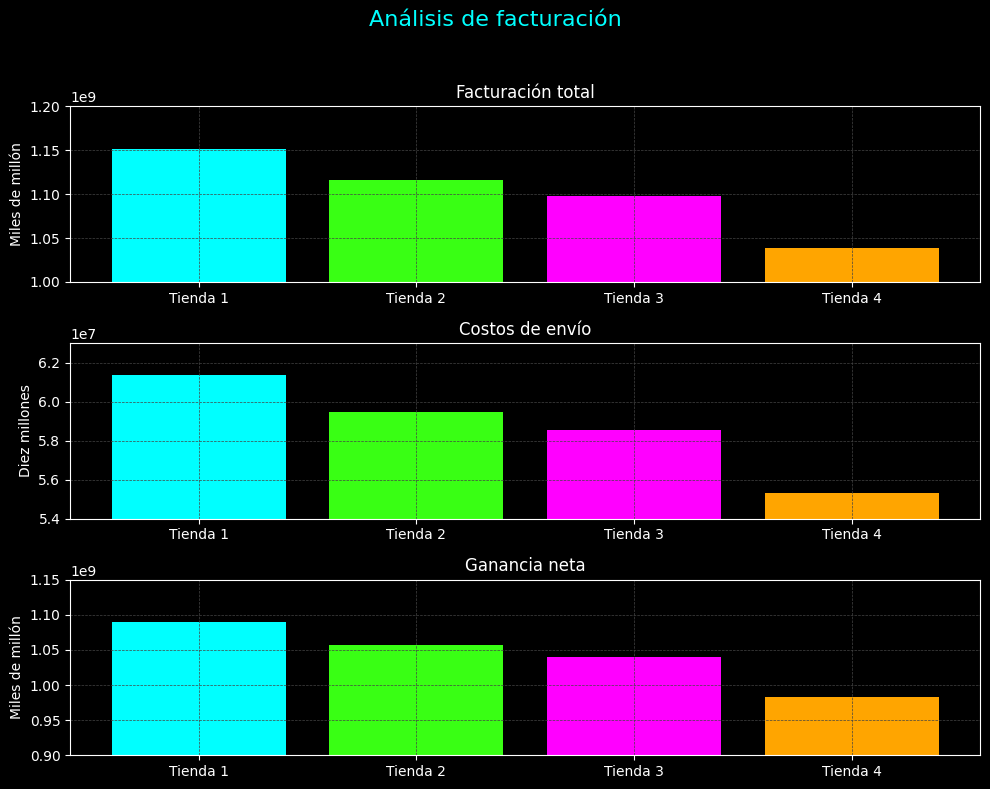

In [19]:
def Analicicis_Facturacion():
  # Estilo futurista
  plt.style.use('dark_background')

  # Paleta por tienda: cyan, verde lima, magenta, naranja neón
  colors = ['#00ffff', '#39ff14', '#ff00ff', '#ffa500']

  fig_facturacion, axs_facturacion = plt.subplots(3, 1, figsize=(10, 8))
  fig_facturacion.suptitle("Análisis de facturación", fontsize=16, color='cyan')

  # --- Facturación total ---
  axs_facturacion[0].bar(tiendas, facturacionTotalTiendas, color=colors)
  axs_facturacion[0].set_ylim(1000000000, 1200000000)
  axs_facturacion[0].set_title('Facturación total', color='white', fontsize=12)
  axs_facturacion[0].set_ylabel('Miles de millón', color='white')

  # --- Costos de envío ---
  axs_facturacion[1].bar(tiendas, costoEnviosTotal, color=colors)
  axs_facturacion[1].set_ylim(54000000, 63000000)
  axs_facturacion[1].set_title('Costos de envío', color='white', fontsize=12)
  axs_facturacion[1].set_ylabel('Diez millones', color='white')

  # --- Ganancia neta ---
  axs_facturacion[2].bar(tiendas, gananciaNeta, color=colors)
  axs_facturacion[2].set_ylim(900000000, 1150000000)
  axs_facturacion[2].set_title('Ganancia neta', color='white', fontsize=12)
  axs_facturacion[2].set_ylabel('Miles de millón', color='white')

  # Ajustes visuales adicionales
  for ax in axs_facturacion:
      ax.tick_params(axis='x', colors='white')
      ax.tick_params(axis='y', colors='white')
      ax.grid(color='#444444', linestyle='--', linewidth=0.5)

  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título
  plt.show()
Analicicis_Facturacion()

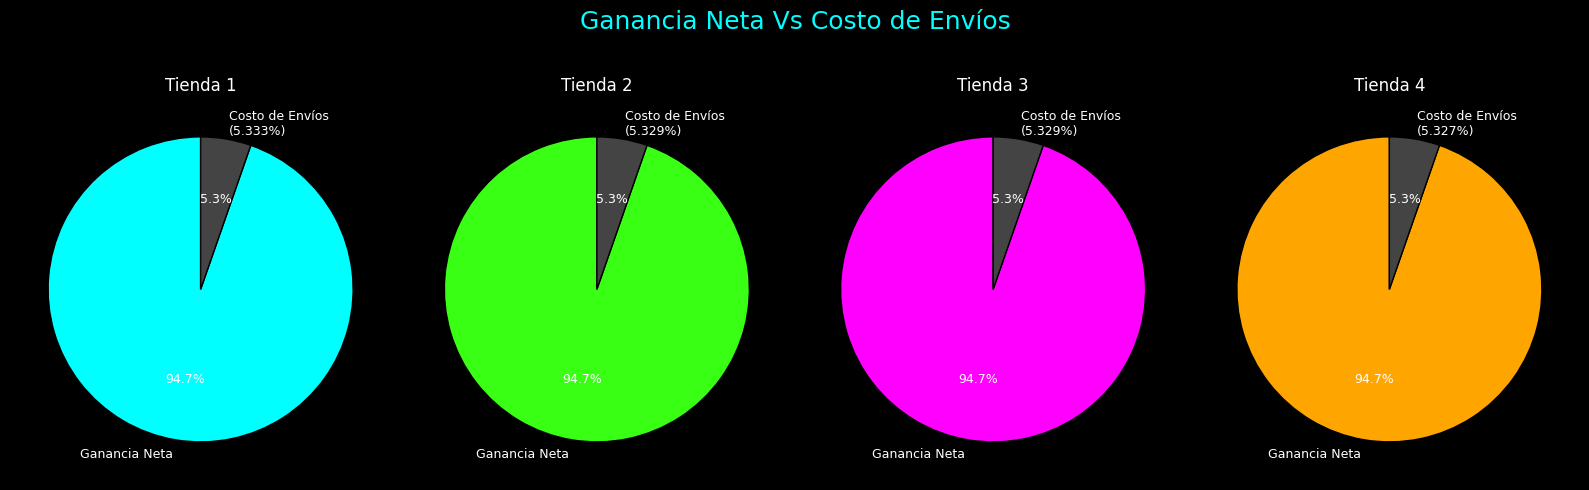

In [20]:
def envio_vs_facturacion():

  # Estilo oscuro futurista
  plt.style.use('dark_background')

  # Paleta de colores por tienda (usaremos 1 par de colores por tienda)
  colores_tiendas = ['#00ffff', '#39ff14', '#ff00ff', '#ffa500']

  # Generar una lista de colores para cada gráfica: [color_ganancia, color_envio]
  colores_pie_por_tienda = [[color, '#444444'] for color in colores_tiendas]

  fig_gastosVSganancia, ax_gastosVSganancias = plt.subplots(1, 4, figsize=(16, 5))
  fig_gastosVSganancia.suptitle("Ganancia Neta Vs Costo de Envíos", fontsize=18, color='cyan')

  labels_base = ['Ganancia Neta', 'Costo de Envíos']

  for i in range(4):
      porcentaje = round((costoEnviosTotal[i] / facturacionTotalTiendas[i]) * 100, 3)
      labels = [labels_base[0], f'{labels_base[1]}\n({porcentaje}%)']
      datos = [gananciaNeta[i], costoEnviosTotal[i]]

      wedges, texts, autotexts = ax_gastosVSganancias[i].pie(
          datos,
          labels=labels,
          colors=colores_pie_por_tienda[i],  # Colores personalizados por tienda
          autopct='%1.1f%%',
          startangle=90,
          wedgeprops={"linewidth": 1, "edgecolor": "black"},
          textprops={'color': 'white'}
      )

      # Personalizar etiquetas internas
      for autotext in autotexts:
          autotext.set_color('white')
          autotext.set_fontsize(9)
      for text in texts:
          text.set_fontsize(9)

      ax_gastosVSganancias[i].set_title(f'Tienda {i+1}', color='white', fontsize=12)

  plt.tight_layout(rect=[0, 0, 1, 0.92])
  plt.show()
envio_vs_facturacion()

# 2. Ventas por categoría

Empezamos tomando como referencia las categorias de 'Categoria del Podricto' de la primera tienda


In [21]:
categorias=list(set(tienda['Categoría del Producto']))
categorias

['Juguetes',
 'Libros',
 'Electrodomésticos',
 'Electrónicos',
 'Muebles',
 'Instrumentos musicales',
 'Artículos para el hogar',
 'Deportes y diversión']

Una vez encontradas las categorias posibles existentes, usamos compresion de listas para crear un diccionario que de como resultado en el orden de las tiendas un diccionario con cada categoria de prodcuto y su respectiva cantidad de ventas


In [22]:
ventas_por_categoria = [dict(columna['Categoría del Producto'].value_counts().items()) for columna in [tienda,tienda2,tienda3,tienda4]]
ventas_por_categoria

[{'Muebles': 465,
  'Electrónicos': 448,
  'Juguetes': 324,
  'Electrodomésticos': 312,
  'Deportes y diversión': 284,
  'Instrumentos musicales': 182,
  'Libros': 173,
  'Artículos para el hogar': 171},
 {'Muebles': 442,
  'Electrónicos': 422,
  'Juguetes': 313,
  'Electrodomésticos': 305,
  'Deportes y diversión': 275,
  'Instrumentos musicales': 224,
  'Libros': 197,
  'Artículos para el hogar': 181},
 {'Muebles': 499,
  'Electrónicos': 451,
  'Juguetes': 315,
  'Electrodomésticos': 278,
  'Deportes y diversión': 277,
  'Libros': 185,
  'Instrumentos musicales': 177,
  'Artículos para el hogar': 177},
 {'Muebles': 480,
  'Electrónicos': 451,
  'Juguetes': 338,
  'Deportes y diversión': 277,
  'Electrodomésticos': 254,
  'Artículos para el hogar': 201,
  'Libros': 187,
  'Instrumentos musicales': 170}]

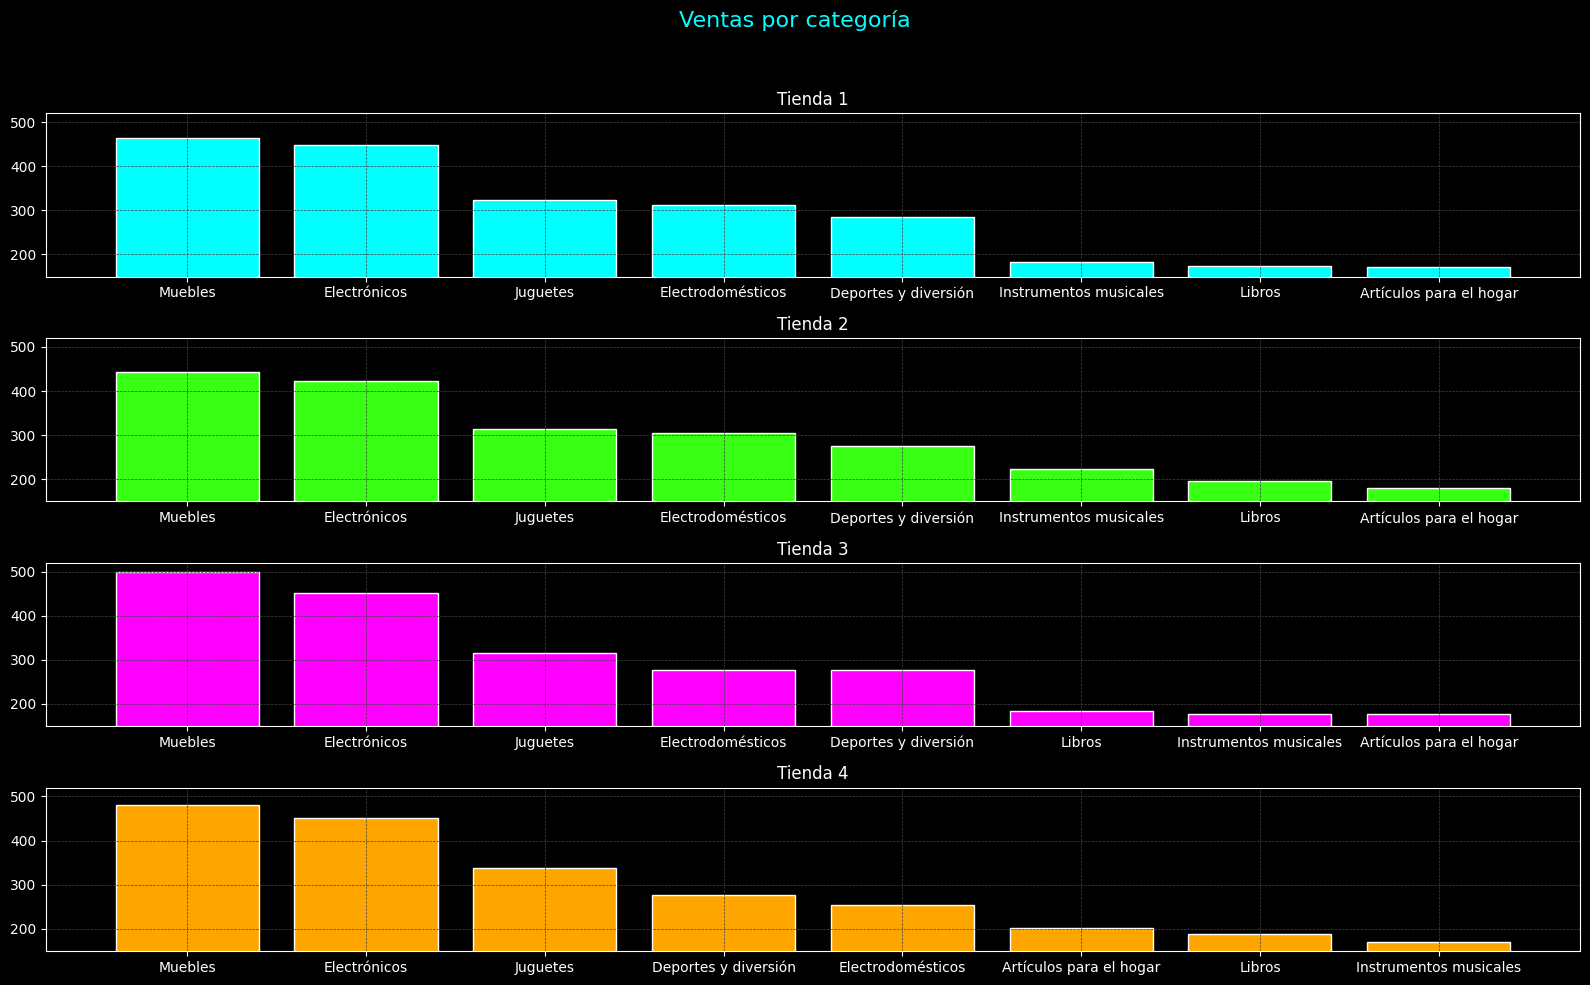

In [23]:
def ventas_categoria():
  # Estilo futurista
  plt.style.use('dark_background')
  colores_barras =  ['#00ffff', '#39ff14', '#ff00ff', '#ffa500'] # Neón: cyan, verde, magenta, fucsia

  fig_categoria_productos, axs_categorias = plt.subplots(4, 1, figsize=(16, 10))
  fig_categoria_productos.suptitle("Ventas por categoría", fontsize=16, color='cyan')

  for i in range(4):
      categorias = list(ventas_por_categoria[i].keys())
      cantidades = list(ventas_por_categoria[i].values())

      axs_categorias[i].bar(
          categorias,
          cantidades,
          color=colores_barras[i % len(colores_barras)],
          edgecolor='white'
      )
      axs_categorias[i].set_ylim(150, 520)
      axs_categorias[i].set_title(f'Tienda {i+1}', color='white')
      axs_categorias[i].tick_params(axis='x', rotation=0, colors='white')
      axs_categorias[i].tick_params(axis='y', colors='white')
      axs_categorias[i].grid(color='#444444', linestyle='--', linewidth=0.5)

  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()
ventas_categoria()

# 3. Calificación promedio de la tienda


In [24]:
calficicacion_tiendas = [round(float(columna['Calificación'].mean()),2) for columna in [tienda,tienda2,tienda3,tienda4]]
calficicacion_tiendas

[3.98, 4.04, 4.05, 4.0]

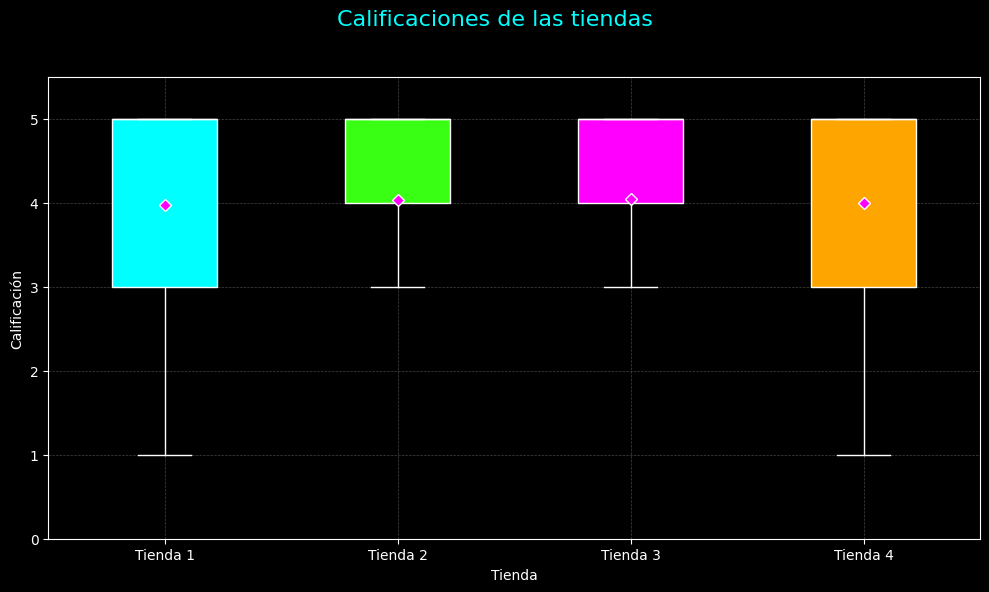

In [25]:
# Estilo oscuro futurista
plt.style.use('dark_background')

# Paleta de colores para cada tienda
colores_tiendas = ['#00ffff', '#39ff14', '#ff00ff', '#ffa500']

# Crear figura y ejes
fig_calificacion, axs_califcion = plt.subplots(figsize=(10, 6))
fig_calificacion.suptitle('Calificaciones de las tiendas', fontsize=16, color='cyan')

# Datos
datos = [columna['Calificación'] for columna in [tienda, tienda2, tienda3, tienda4]]

# Boxplot base
cajas_calificaciones = axs_califcion.boxplot(
    datos,
    patch_artist=True,
    showmeans=True,
    showfliers=False,
    capprops=dict(color='white'),
    whiskerprops=dict(color='white'),
    flierprops=dict(marker='o', color='red', alpha=0.5),
    meanprops=dict(marker='D', markeredgecolor='white', markerfacecolor='#ff00ff'),
    medianprops=dict(color='white')  # Puedes dejar 'white' si quieres contraste
)

# Aplicar colores personalizados a cada caja
for patch, color in zip(cajas_calificaciones['boxes'], colores_tiendas):
    patch.set_facecolor(color)
    patch.set_edgecolor('white')

# Etiquetas y estética
axs_califcion.set_ylabel('Calificación', color='white')
axs_califcion.set_xlabel('Tienda', color='white')
axs_califcion.set_ylim(0, 5.5)
axs_califcion.set_xticks([1, 2, 3, 4])
axs_califcion.set_xticklabels(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], color='white')
axs_califcion.tick_params(colors='white')
axs_califcion.grid(color='#444444', linestyle='--', linewidth=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


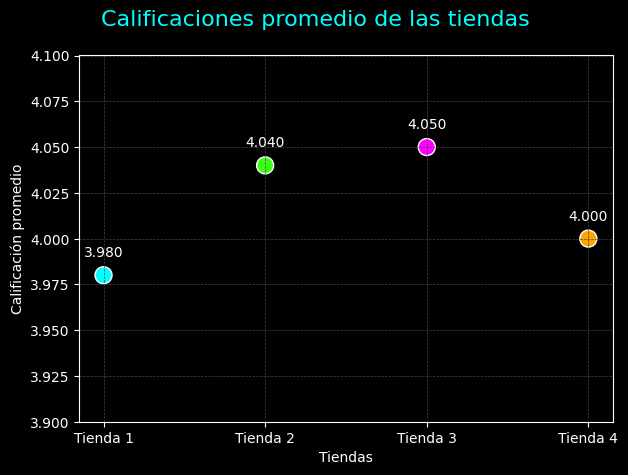

In [26]:
def calficiacion_cliente():
  # Estilo futurista
  plt.style.use('dark_background')

  colores_tiendas = ['#00ffff', '#39ff14', '#ff00ff', '#ffa500']

  fig_calificacion_promedio, axs_califciones = plt.subplots()
  fig_calificacion_promedio.suptitle('Calificaciones promedio de las tiendas', fontsize=16, color='cyan')

  # Gráfica tipo scatter con paleta de colores personalizada
  axs_califciones.scatter(tiendas, calficicacion_tiendas, color=colores_tiendas, edgecolors='white', s=150)

  # Personalización estética
  axs_califciones.set_ylabel('Calificación promedio', color='white')
  axs_califciones.set_xlabel('Tiendas', color='white')
  axs_califciones.set_ylim(3.9, 4.1)
  axs_califciones.tick_params(axis='x', colors='white')
  axs_califciones.tick_params(axis='y', colors='white')
  axs_califciones.grid(color='#444444', linestyle='--', linewidth=0.5)

  # Anotación de valores encima de cada punto
  for i, valor in enumerate(calficicacion_tiendas):
      axs_califciones.annotate(f'{valor:.3f}', (tiendas[i], calficicacion_tiendas[i] + 0.01), color='white', ha='center')

  plt.tight_layout()
  plt.show()
calficiacion_cliente()

# 4. Productos más y menos vendidos

Emepezamos creando una lista con todos los productos posibles

In [27]:
lista_de_productos = list(set(tienda['Producto']))
print(lista_de_productos)

['Impresora', 'Celular ABXY', 'Secadora de ropa', 'Vaso térmico', 'Sofá reclinable', 'Bicicleta', 'Cubertería', 'Muñeca bebé', 'Cubo mágico 8x8', 'Microondas', 'Modelado predictivo', 'Auriculares', 'Iniciando en programación', 'Estufa', 'Asistente virtual', 'Set de ollas', 'Dinosaurio Rex', 'Auriculares con micrófono', 'Dashboards con Power BI', 'Mochila', 'Mesa de noche', 'Pandereta', 'Lavadora de ropa', 'Sillón', 'Cuerda para saltar', 'Mesa de centro', 'Guitarra eléctrica', 'Set de vasos', 'Cama box', 'Bloques de construcción', 'Iphone 15', 'Olla de presión', 'Carrito de control remoto', 'Smart TV', 'Kit de bancas', 'TV LED UHD 4K', 'Balón de voleibol', 'Armario', 'Ciencia de datos con Python', 'Balón de baloncesto', 'Cama king', 'Batería', 'Tablet ABXY', 'Ajedrez de madera', 'Mesa de comedor', 'Lavavajillas', 'Refrigerador', 'Silla de oficina', 'Smartwatch', 'Guitarra acústica', 'Juego de mesa']


Semejante al apartado 2, creamos una lista de diccionarios que contenga todos los productos y sus cantidades vendisdas

In [28]:
ventas_por_producto = [dict(columna['Producto'].value_counts().items()) for columna in [tienda,tienda2,tienda3,tienda4]]
print(ventas_por_producto)

[{'Microondas': 60, 'TV LED UHD 4K': 60, 'Armario': 60, 'Secadora de ropa': 58, 'Mesa de noche': 56, 'Bloques de construcción': 56, 'Balón de baloncesto': 55, 'Bicicleta': 54, 'Vaso térmico': 54, 'Refrigerador': 54, 'Impresora': 54, 'Batería': 53, 'Cubertería': 52, 'Carrito de control remoto': 52, 'Modelado predictivo': 51, 'Auriculares': 50, 'Ajedrez de madera': 49, 'Iphone 15': 49, 'Lavavajillas': 48, 'Lavadora de ropa': 47, 'Guitarra eléctrica': 47, 'Guitarra acústica': 46, 'Sofá reclinable': 46, 'Silla de oficina': 46, 'Estufa': 45, 'Cama box': 44, 'Kit de bancas': 44, 'Smart TV': 44, 'Cama king': 44, 'Cubo mágico 8x8': 44, 'Mesa de centro': 44, 'Set de ollas': 43, 'Smartwatch': 43, 'Juego de mesa': 43, 'Balón de voleibol': 42, 'Dashboards con Power BI': 42, 'Tablet ABXY': 42, 'Sillón': 41, 'Iniciando en programación': 41, 'Set de vasos': 41, 'Asistente virtual': 40, 'Muñeca bebé': 40, 'Mesa de comedor': 40, 'Dinosaurio Rex': 40, 'Cuerda para saltar': 40, 'Mochila': 39, 'Ciencia de

Con la lista anterior, podemos crear dos nuevas listas las cuales nos diran cual es la cantidad maxmia y minima de de ventas de los productos

In [29]:
ventas_maxmimas_producto = [max(diccionario.values())for diccionario in ventas_por_producto]
ventas_maxmimas_producto

[60, 65, 57, 62]

In [30]:
ventas_minimas_producto = [min(diccionario.values())for diccionario in ventas_por_producto]
ventas_minimas_producto

[33, 32, 35, 33]

Con las anteriores listas, creamos dos nuevas listas, las cuales relacionan la cantidad maxima de productos vendidos con los productos que se hallan vendido de en esa cantidad con el objetivo de encontrar si hubo mas de un producto con esa cantidad de ventas.

Se realiza lo mismo con el producto menos vendio

In [31]:
productos_mas_vendidos = []
cantidad_productos_mas_vendidos = []
for i,productos in enumerate(ventas_por_producto):
  for j,producto in enumerate(productos):
    if (productos[producto]==ventas_maxmimas_producto[i]):
      productos_mas_vendidos.append(producto)
      cantidad_productos_mas_vendidos.append(productos[producto])
productos_mas_vendidos
cantidad_productos_mas_vendidos

[60, 60, 60, 65, 57, 62]

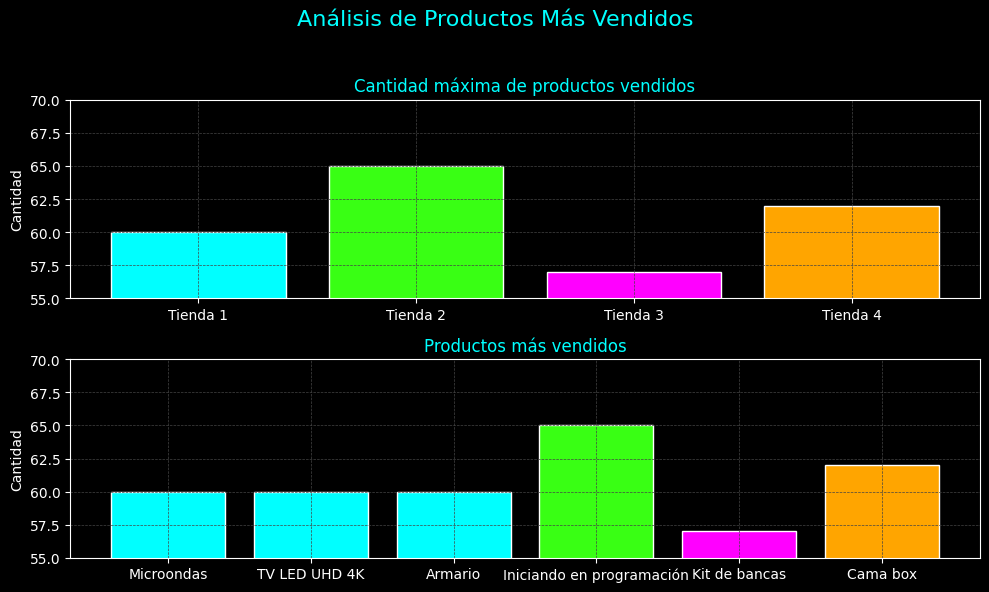

In [41]:
def mas_Vendido():
  plt.style.use('dark_background')

  fig_productos_mas_vendidos, ax_productos_mas_vendidos = plt.subplots(2, 1, figsize=(10, 6))
  fig_productos_mas_vendidos.suptitle('Análisis de Productos Más Vendidos', fontsize=16, color='cyan')

  # Colores neón para barras
  colores_tiendas = ['#00ffff', '#39ff14', '#ff00ff', '#ffa500']
  colores_productos = ['#00ffff', '#00ffff', '#00ffff', '#39ff14', '#ff00ff', '#ffa500']

  # Primera gráfica: cantidad máxima por tienda
  ax_productos_mas_vendidos[0].bar(tiendas, ventas_maxmimas_producto, color=colores_tiendas, edgecolor='white')
  ax_productos_mas_vendidos[0].set_title('Cantidad máxima de productos vendidos', color='cyan')
  ax_productos_mas_vendidos[0].tick_params(axis='x', colors='white')
  ax_productos_mas_vendidos[0].tick_params(axis='y', colors='white')
  ax_productos_mas_vendidos[0].set_ylabel('Cantidad', color='white')
  ax_productos_mas_vendidos[0].grid(color='#444444', linestyle='--', linewidth=0.5)
  ax_productos_mas_vendidos[0].set_ylim(55,70)
  # Segunda gráfica: productos más vendidos
  ax_productos_mas_vendidos[1].bar(productos_mas_vendidos, cantidad_productos_mas_vendidos, color=colores_productos, edgecolor='white')
  ax_productos_mas_vendidos[1].set_title('Productos más vendidos', color='cyan')
  ax_productos_mas_vendidos[1].tick_params(axis='x', colors='white')
  ax_productos_mas_vendidos[1].tick_params(axis='y', colors='white')
  ax_productos_mas_vendidos[1].set_ylabel('Cantidad', color='white')
  ax_productos_mas_vendidos[1].grid(color='#444444', linestyle='--', linewidth=0.5)
  ax_productos_mas_vendidos[1].set_ylim(55,70)

  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()
mas_Vendido()

In [33]:
productos_menos_vendidos = []
cantidad_productos_menos_vendidos =[]
for i,productos in enumerate(ventas_por_producto):
  for j,producto in enumerate(productos):
    if (productos[producto]==ventas_minimas_producto[i]):
      productos_menos_vendidos.append(producto)
      cantidad_productos_menos_vendidos.append(productos[producto])
productos_menos_vendidos

['Auriculares con micrófono',
 'Celular ABXY',
 'Juego de mesa',
 'Bloques de construcción',
 'Guitarra eléctrica']

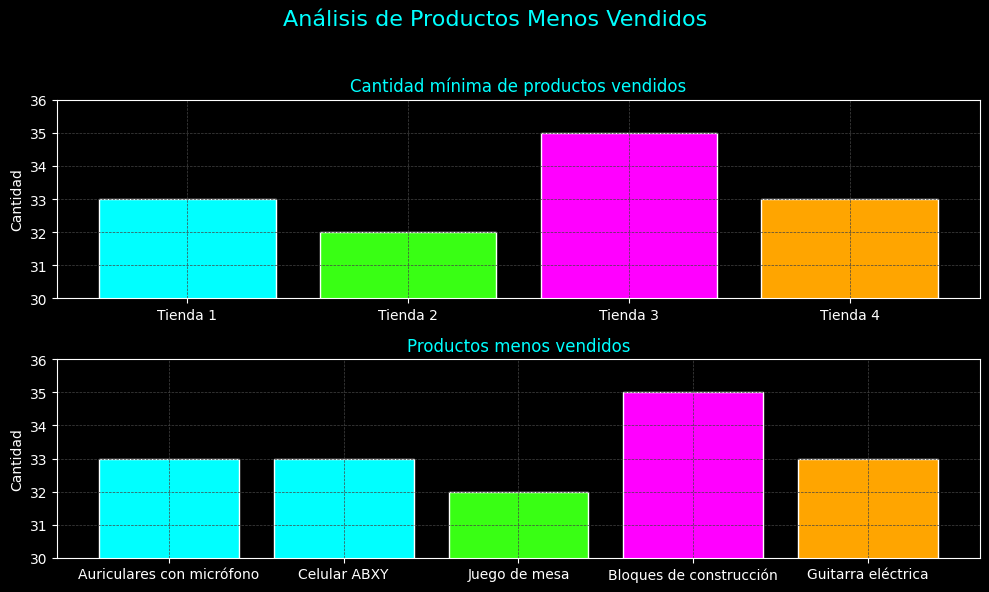

In [43]:
def menos_vendido():
  plt.style.use('dark_background')

  fig_productos_menos_vendidos, ax_productos_menos_vendidos = plt.subplots(2, 1, figsize=(10, 6))
  fig_productos_menos_vendidos.suptitle('Análisis de Productos Menos Vendidos', fontsize=16, color='cyan')

  colores_tiendas = ['#00ffff', '#39ff14', '#ff00ff', '#ffa500']
  colores_productos = ['#00ffff', '#00ffff', '#39ff14', '#ff00ff', '#ffa500']

  # Gráfica cantidad mínima por tienda
  ax_productos_menos_vendidos[0].bar(tiendas, ventas_minimas_producto, color=colores_tiendas, edgecolor='white')
  ax_productos_menos_vendidos[0].set_title('Cantidad mínima de productos vendidos', color='cyan')
  ax_productos_menos_vendidos[0].tick_params(axis='x', colors='white')
  ax_productos_menos_vendidos[0].tick_params(axis='y', colors='white')
  ax_productos_menos_vendidos[0].set_ylabel('Cantidad', color='white')
  ax_productos_menos_vendidos[0].grid(color='#444444', linestyle='--', linewidth=0.5)
  ax_productos_menos_vendidos[0].set_ylim(30,36)
  # Gráfica productos menos vendidos
  ax_productos_menos_vendidos[1].bar(productos_menos_vendidos, cantidad_productos_menos_vendidos, color=colores_productos, edgecolor='white')
  ax_productos_menos_vendidos[1].set_title('Productos menos vendidos', color='cyan')
  ax_productos_menos_vendidos[1].tick_params(axis='x', rotation=0, colors='white')
  ax_productos_menos_vendidos[1].tick_params(axis='y', colors='white')
  ax_productos_menos_vendidos[1].set_ylabel('Cantidad', color='white')
  ax_productos_menos_vendidos[1].grid(color='#444444', linestyle='--', linewidth=0.5)
  ax_productos_menos_vendidos[1].set_ylim(30,36)

  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()
menos_vendido()

# 5. Envío promedio por tienda

Semejante al apartado 3, se realiza directamente el promedio de las columnas segun comprension de listas

In [35]:
envio_tiendas = [round(float(columna['Costo de envío'].mean()),2) for columna in [tienda,tienda2,tienda3,tienda4]]
envio_tiendas

[26018.61, 25216.24, 24805.68, 23459.46]

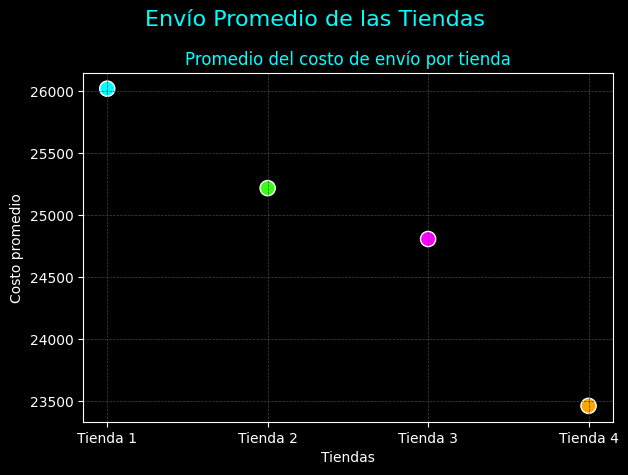

In [36]:
plt.style.use('dark_background')

colores_tiendas = ['#00ffff', '#39ff14', '#ff00ff', '#ffa500']

fig_envio_promedio, axs_envio_promedio = plt.subplots()
fig_envio_promedio.suptitle('Envío Promedio de las Tiendas', fontsize=16, color='cyan')

# Gráfico tipo scatter con colores personalizados por tienda
axs_envio_promedio.scatter(
    tiendas, envio_tiendas,
    color=colores_tiendas,
    edgecolor='white',
    s=120,
    marker='o'
)

axs_envio_promedio.set_title('Promedio del costo de envío por tienda', color='cyan')
axs_envio_promedio.set_ylabel('Costo promedio', color='white')
axs_envio_promedio.set_xlabel('Tiendas', color='white')
axs_envio_promedio.tick_params(axis='x', colors='white')
axs_envio_promedio.tick_params(axis='y', colors='white')
axs_envio_promedio.grid(color='#444444', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Informe final

El presente informe se realiza con base en la solicutd del señor Juan para decidir que tienda de su cade Alura Store debe vender para empezar un nuevo emprendimiento.
Se porprociono un dataset referente a 4 de sus tiendas donde la informacion presente tenida diversos datos, donde se les dio mas peso a su facturacion, cosots de envio, productos vendidos, categorias de los productos, satisfaccion del cliente.

***Facturación***

Empezando con el tema de la facturacion, en las tablas se puede observar que el comportamiento de las tiendas de la 1 a la 4 facturaron en orden desendente, siendo la tienda 1 la que mas facturo y la tienda 4 la que menos facturo.

De igual modo se analizo el gasto en envios y la ganancia resultante despues del envio, dando como resultado que todas las tiendas invirtieron aproximadamente el 5.3% de sus ingresos en los envios.

Por lo tanto en este factor, quien queda a la delantera es la tienda 1 mientras que la tienda 4 se queda como ultima opcion a mantener.

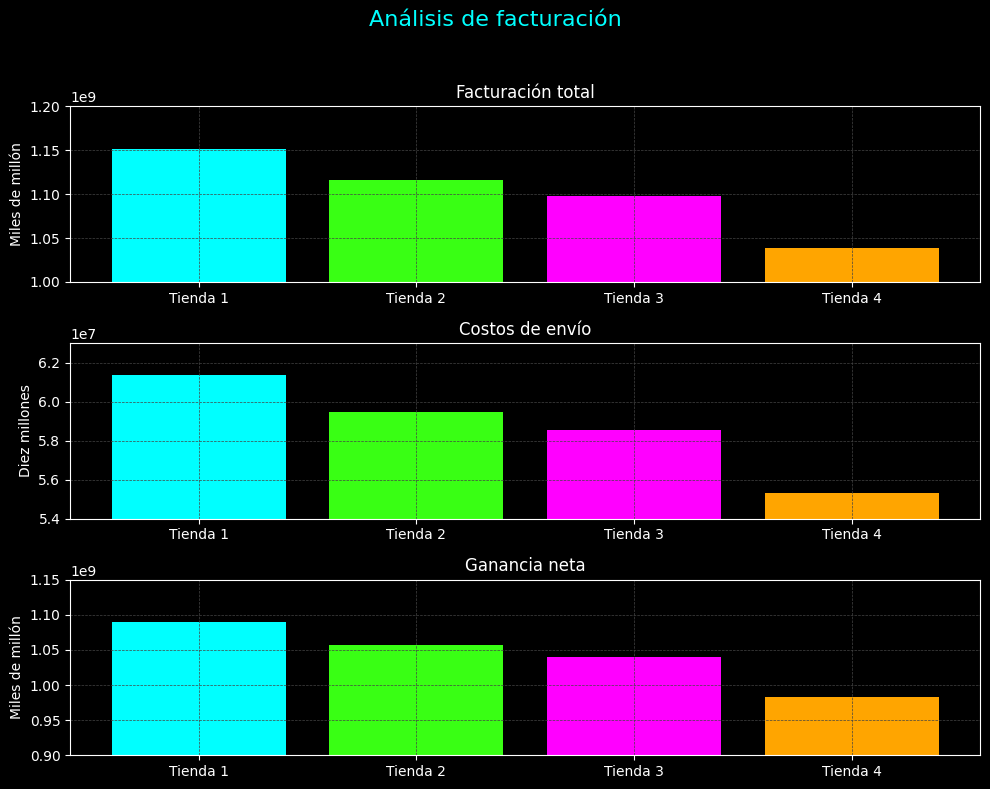

In [37]:
Analicicis_Facturacion()

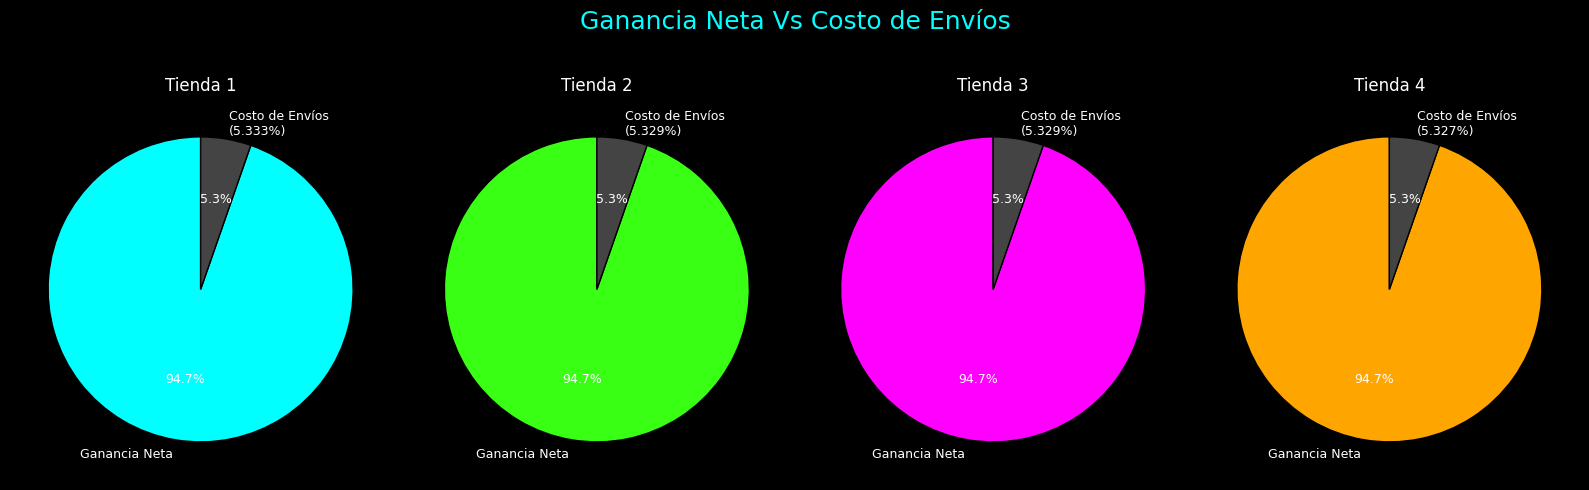

In [38]:
envio_vs_facturacion()



***Calificacion del cliente***

Se esperaria que quien mas factura es quien tenga una mayor calificacion de los clientes, sin embargo en este caso quien se lleva la delantera es la tercera tienda y 4.05, mientras que la tienda 1 queda en ultimo lugar con 3.98.

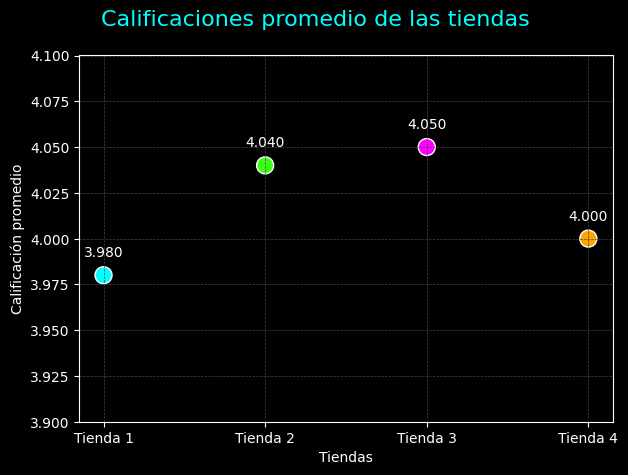

In [39]:
calficiacion_cliente()

***Ventas***

En todas las tiendas las principales categorias vendidas son: "Muebles", "Electornicos" y "Juguetes" en ese orden. Y parece que los productos mas vendidos estan dentro de esas categorias para cada tienda. Ya sea para el mas o el menos vendido.

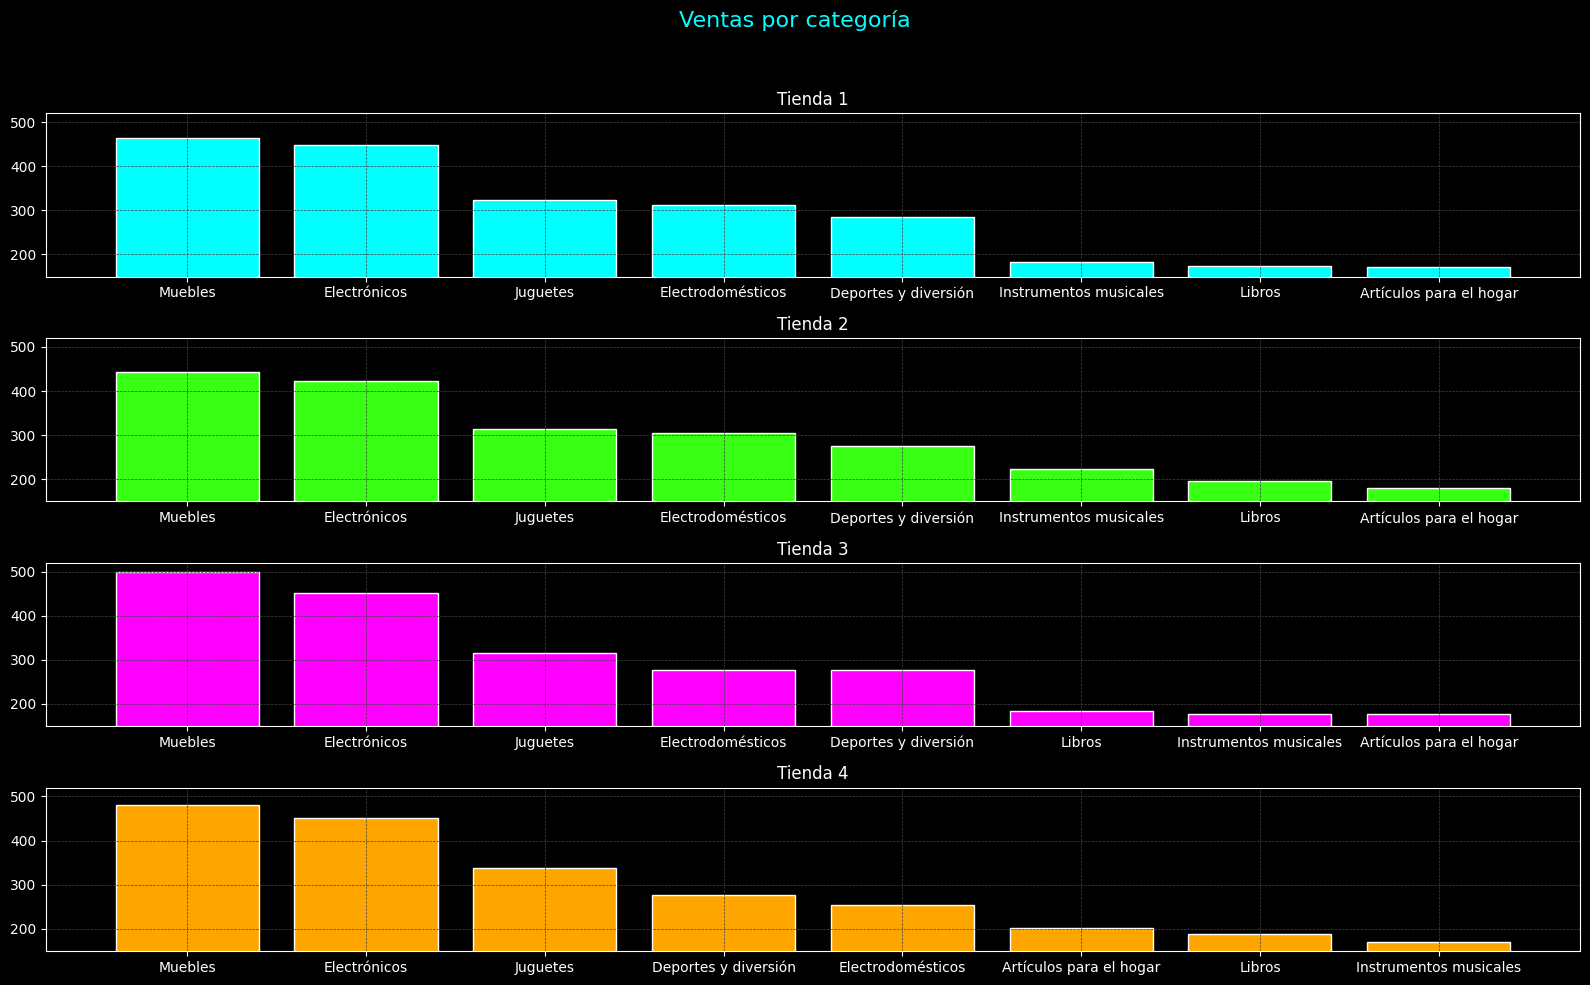

In [40]:
ventas_categoria()

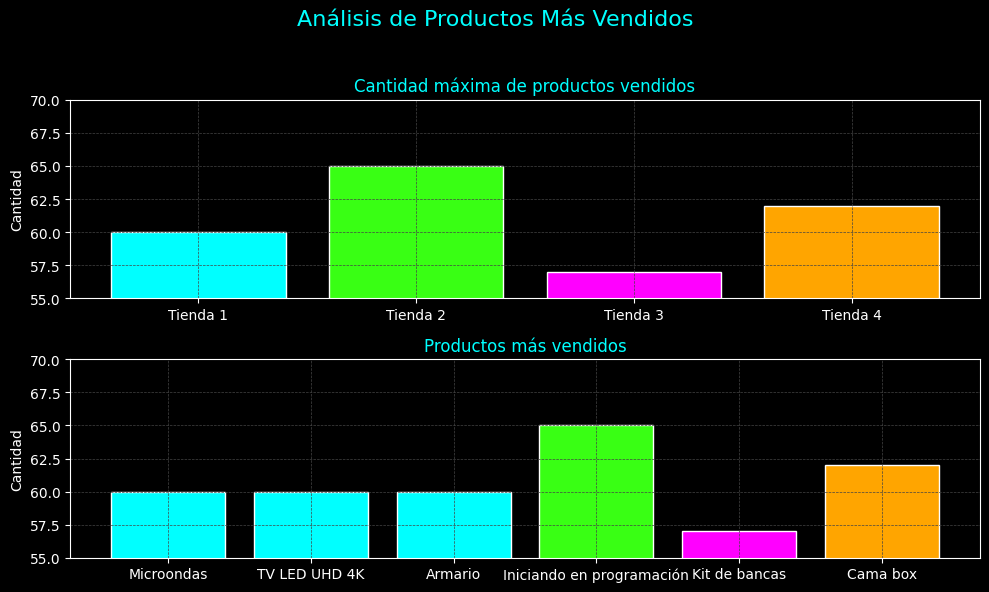

In [42]:
mas_Vendido()

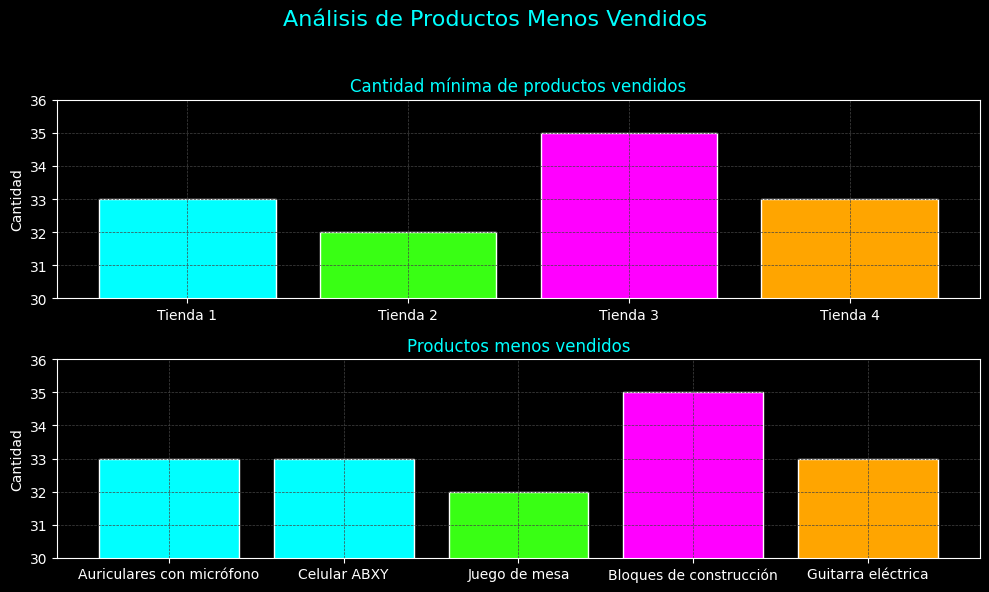

In [44]:
menos_vendido()

***Conclusion***

Si bien el exito del cleinte puede hacer que mas personas acudan a su tienda, parece que todos tienen valores muy semejante en productos y calificacion, por lo que el factor decisivo es el factor economico, por lo cual la tienda que deberia eliminar es la *Tienda 4*.

Por otro lado podria poner mayor capacitacion en la tienda 1 respecto al trato con el cliente para mejorar sus calificaciones